In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
ds = pd.read_csv('/Users/regina/UH_projects/MLD_Themo/data/themo_sst0717-0618.csv',
                 parse_dates=[[0, 1]], index_col=0)
ds = ds.drop(columns=['threshold', 'const_err', 's9_id'])
ds = ds[:'2018-02-13']
ds = ds[(ds.temperature < 35)] 

In [3]:
day_1 = ds['2017-07-26']
midnight = day_1[:7]
midnight = midnight.sort_values(by='depth', ascending=True)
x = np.asarray(midnight.temperature)
x = (29.66,  27.62,  24.81,  22.81,  21.58,  21.15,  20.38)
y = np.asarray(midnight.depth)
y = (5, 23, 32, 50, 59, 68, 77)
xs = np.sort(x)
ys = np.array(y)[np.argsort(x)]
x0 = (29.66-0.2)
y0 = np.interp(x0, xs, ys)

Text(29.46, 6.764705882352935, '0.2 Temperature Change: MLD')

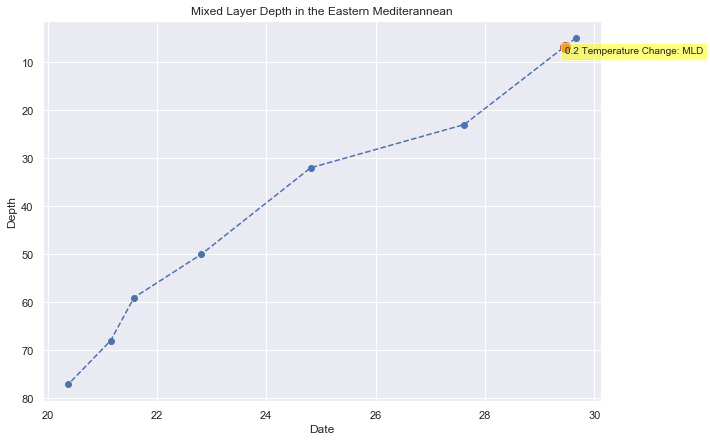

In [5]:
## Plot details
fig = plt.figure(figsize=(10,7)), plt.plot(style='.-')
plt.title("Mixed Layer Depth in the Eastern Mediterannean")
plt.xlabel("Date"), plt.ylabel("Depth")
plt.gca().invert_yaxis()
plt.plot(x,y, linestyle='--', marker='o', color='b')
plt.plot(x0,y0, marker="o", markersize='10', color="C3")
plt.annotate(
        "0.2 Temperature Change: MLD", xy=(x0, y0), ha='left',
        va='top', bbox=dict(BoxStyle='Round, pad=0.5', fc='yellow',
        alpha=0.5), arrowprops=dict(facecolor='black', shrink=0.05))

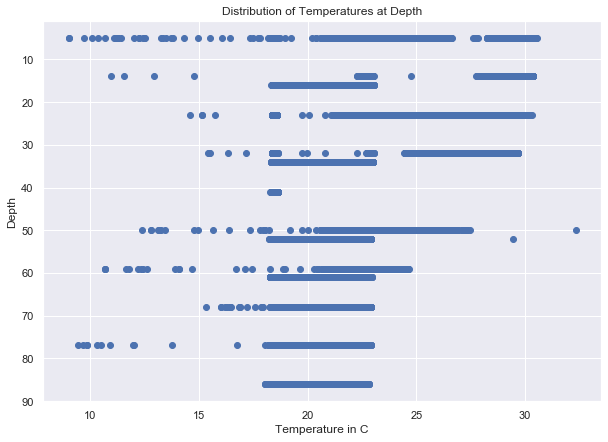

In [9]:
## Scatter plot showing depth distribution - Some outliers?
scatter = plt.figure(figsize=(10,7))
plt.scatter(ds.temperature, ds.depth) 

tkw = dict(size=15, width=1.5)
plt.title("Distribution of Temperatures at Depth")
plt.xlabel("Temperature in C")
plt.ylabel("Depth")
plt.gca().invert_yaxis()